<a href="https://colab.research.google.com/github/ajayrfhp/LearningDeepLearning/blob/main/letnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- LeNet
  - Architecture
    - CNN1, CNN2, FC1, FC2, FC3
    - Each CNN block contains CNN, Sigmoid and average pooling
    - Compressed notation
      - 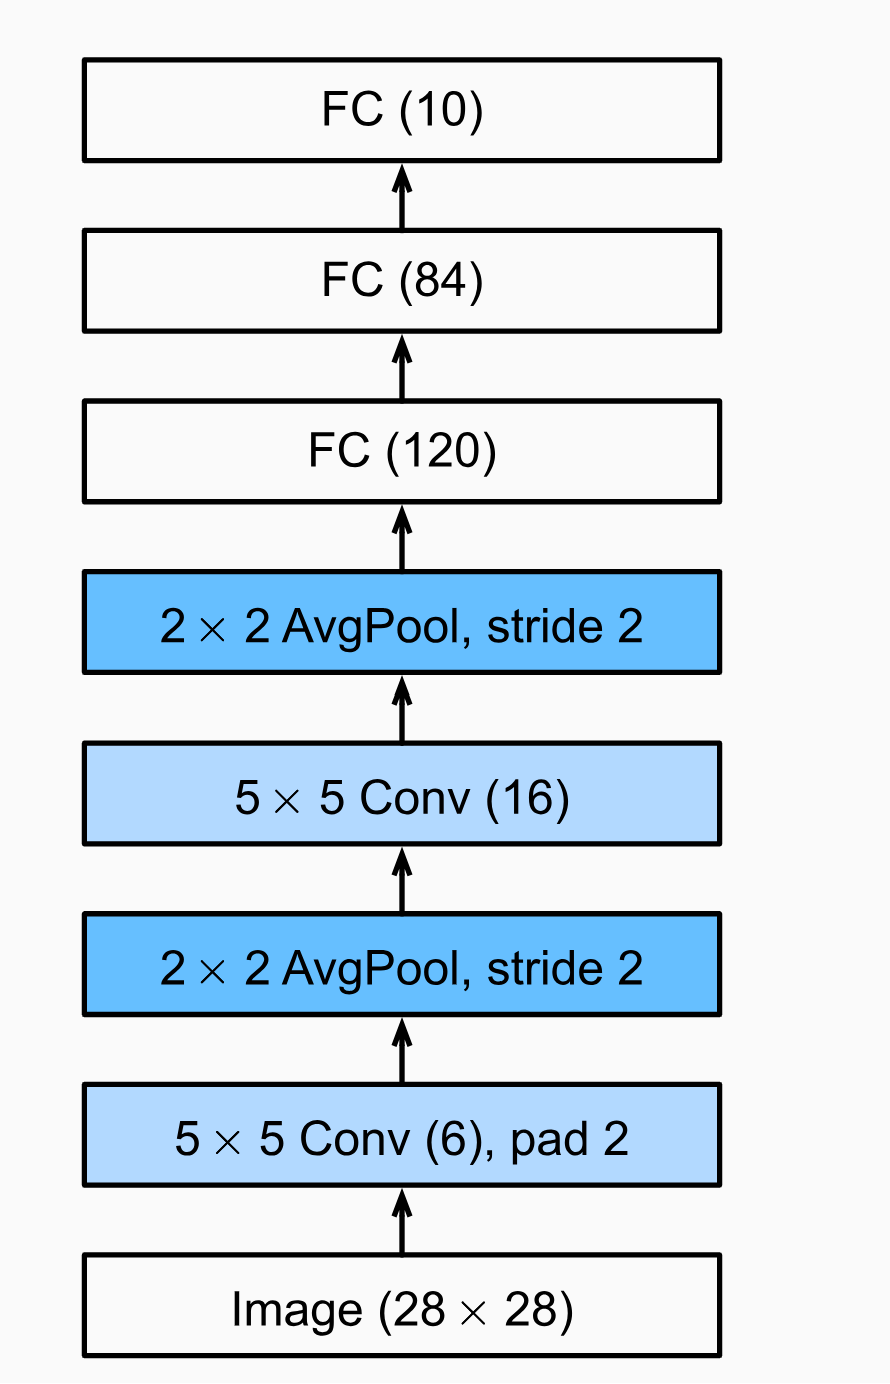
    


In [ ]:
!pip install d2l

In [ ]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
device_type = 'cpu'
if torch.cuda.is_available():
  device_type = 'cuda'

device = torch.device(device_type)
device

device(type='cuda')

In [ ]:
def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
  def __init__(self, num_classes=10, lr=0.1):
    super().__init__()
    self.lr = lr
    self.net = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
        nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0),
        nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2),
        nn.Flatten(),
        nn.LazyLinear(120),
        nn.Sigmoid(),
        nn.LazyLinear(84),
        nn.Sigmoid(),
        nn.LazyLinear(num_classes)
    )

  def forward(self, x):
    return self.net(x)

  def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
      X = layer(X)
      print(layer.__class__.__name__, "output shape = ", X.shape)



model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape =  torch.Size([1, 6, 28, 28])
Sigmoid output shape =  torch.Size([1, 6, 28, 28])
AvgPool2d output shape =  torch.Size([1, 6, 14, 14])
Conv2d output shape =  torch.Size([1, 16, 10, 10])
Sigmoid output shape =  torch.Size([1, 16, 10, 10])
AvgPool2d output shape =  torch.Size([1, 16, 5, 5])
Flatten output shape =  torch.Size([1, 400])
Linear output shape =  torch.Size([1, 120])
Sigmoid output shape =  torch.Size([1, 120])
Linear output shape =  torch.Size([1, 84])
Sigmoid output shape =  torch.Size([1, 84])
Linear output shape =  torch.Size([1, 10])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


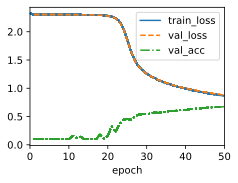

In [ ]:
trainer = d2l.Trainer(max_epochs=50, num_gpus=1)
data = d2l.FashionMNIST(batch_size=1000)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [ ]:

def get_loss(model, data):
  model.train = False

  losses, access = [], []
  for (inputs, outputs) in data.val_dataloader():
    preds = model.forward(inputs.to(device))
    loss = model.loss(preds, outputs.to(device)).item()
    acc = model.accuracy(preds, outputs.to(device)).item()
    losses.append(loss)
    access.append(acc)

  return np.mean(np.array(losses)), np.mean(np.array(access))
get_loss(model, data)

NameError: name 'data' is not defined

In [ ]:
def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNetModern(d2l.Classifier):
  def __init__(self, num_classes=10, lr=0.1):
    super().__init__()
    self.lr = lr
    self.net = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6, out_channels=6, kernel_size=5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Flatten(),
        nn.LazyLinear(120),
        nn.ReLU(),
        nn.LazyLinear(84),
        nn.ReLU(),
        nn.LazyLinear(num_classes)
    )

  def forward(self, x):
    return self.net(x)

  def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
      X = layer(X)
      print(layer.__class__.__name__, "output shape = ", X.shape)



modern_model = LeNetModern()
data = d2l.FashionMNIST(batch_size=1000)
modern_model.layer_summary((1, 1, 28, 28))

NameError: name 'd2l' is not defined

In [ ]:
trainer = d2l.Trainer(max_epochs=100, num_gpus=1)

modern_model = LeNetModern(lr=0.1)
modern_model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(modern_model, data)
get_loss(modern_model, data)

(0.3283344805240631, 0.8822000384330749)

In [ ]:
from google.colab import files
import helper

In [ ]:

torch.save(model.state_dict(), 'lenet.pth')
files.download('lenet.pth')

torch.save(modern_model.state_dict(), 'modern_lenet.pth')
files.download('modern_lenet.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>